# ISIC 2019 Data Analysis

## Common Parameters

## Import Training Data

In [15]:
import os
import matplotlib.pyplot as plt
from IPython.display import Image
from collections import Counter
sys.path.append("..") # Adds higher directory to python modules path.
from data.data_loader import *
from visuals import *
from utils import *
from math import floor

%load_ext autoreload
%autoreload 2
%matplotlib inline

data_folder = '../data/isic2019'

model_folder = 'models'
history_folder = 'history'
pred_result_folder_val = 'val_predict_results'
out_dist_pred_result_folder = 'out_dist_predict_results'
    
workers = os.cpu_count()

# How to handle SVG fonts
plt.rcParams['svg.fonttype'] = 'none'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Number of known categories: 8
['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'] 

Number of unknown categories: 1
UNK 

Category to Index:
{'MEL': 0, 'NV': 1, 'BCC': 2, 'AK': 3, 'BKL': 4, 'DF': 5, 'VASC': 6, 'SCC': 7, 'UNK': 8} 

Original training data has 25331 samples.
'MEL':	4522	(17.85%)
'NV':	12875	(50.83%)
'BCC':	3323	(13.12%)
'AK':	867	(3.42%)
'BKL':	2624	(10.36%)
'DF':	239	(0.94%)
'VASC':	253	(1.00%)
'SCC':	628	(2.48%)
'UNK':	0	(0.00%)


image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK  \
0  ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
1  ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
2  ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
3  ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
4  ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   

                                                path  category  
0  ../data/isic2019/ISIC_2019_Training_Input/ISIC...         1  
1  ../data/isic2019/ISIC_2019_Training_Input/ISIC...         1  
2  ../data/isic2019/ISIC_2019_Training_Input/ISIC...         0  
3  ../data/isic2019/ISIC_2019_Training_Input/ISIC...         1  
4  ../data/isic2019/ISIC_2019_Training_Input/ISIC...         0

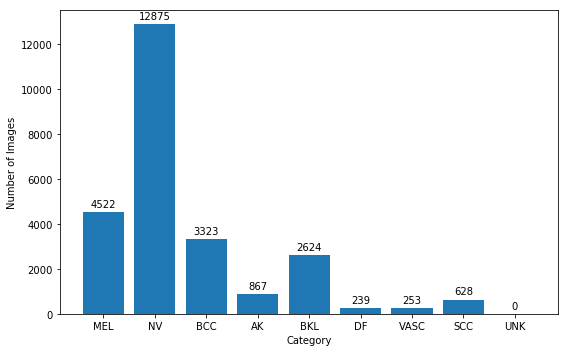

In [8]:
training_image_folder = os.path.join(data_folder, 'ISIC_2019_Training_Input')
ground_truth_file = os.path.join(data_folder, 'ISIC_2019_Training_GroundTruth.csv')

df_ground_truth, known_category_names, unknown_category_name = load_isic_training_data(training_image_folder, ground_truth_file)
known_category_num = len(known_category_names)
print("Number of known categories: {}".format(known_category_num))
print(known_category_names, '\n')
unknown_category_num = 1
print("Number of unknown categories: {}".format(unknown_category_num))
print(unknown_category_name, '\n')
all_category_names = known_category_names + [unknown_category_name]
all_category_num = known_category_num + unknown_category_num

# mapping from category to index
print('Category to Index:')
category_to_index = dict((c, i) for i, c in enumerate(all_category_names))
print(category_to_index, '\n')

count_per_category = Counter(df_ground_truth['category'])
total_sample_count = sum(count_per_category.values())
print("Original training data has {} samples.".format(total_sample_count))
for i, c in enumerate(all_category_names):
    print("'%s':\t%d\t(%.2f%%)" % (c, count_per_category[i], count_per_category[i]*100/total_sample_count))

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('white')
ax.set(xlabel='Category', ylabel='Number of Images')
# plt.bar(count_per_category.keys(), count_per_category.values())
rects = plt.bar(all_category_names, [count_per_category[i] for i in range(all_category_num)])
autolabel(ax, rects)
fig.tight_layout()

df_ground_truth.head()

### Shuffle and Split Training Data into Training  and Validation Sets

Training set has 20264 samples.
'MEL':	3618	(17.85%)
'NV':	10300	(50.83%)
'BCC':	2658	(13.12%)
'AK':	694	(3.42%)
'BKL':	2099	(10.36%)
'DF':	191	(0.94%)
'VASC':	202	(1.00%)
'SCC':	502	(2.48%)
'UNK':	0	(0.00%)

Validation set has 5067 samples.
'MEL':	904	(17.84%)
'NV':	2575	(50.82%)
'BCC':	665	(13.12%)
'AK':	173	(3.41%)
'BKL':	525	(10.36%)
'DF':	48	(0.95%)
'VASC':	51	(1.01%)
'SCC':	126	(2.49%)
'UNK':	0	(0.00%)


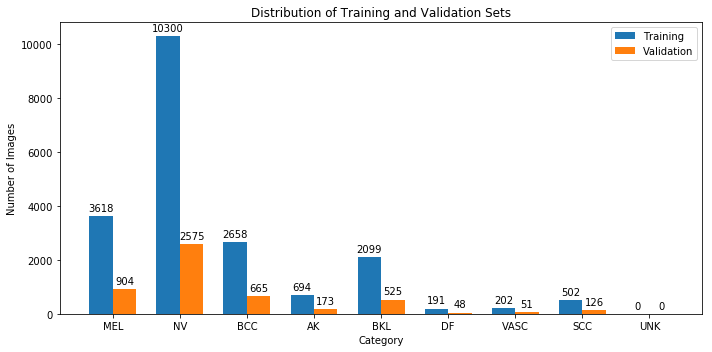

In [9]:
df_train, df_test = train_validation_split(df_ground_truth)
df_train, df_val = train_validation_split(df_ground_truth)

# Training Set
sample_count_train = df_train.shape[0]
print("Training set has {} samples.".format(sample_count_train))
count_per_category_train = Counter(df_train['category'])
for i, c in enumerate(all_category_names):
    print("'%s':\t%d\t(%.2f%%)" % (c, count_per_category_train[i], count_per_category_train[i]*100/sample_count_train))

# Validation Set
sample_count_val = df_val.shape[0]
print("\nValidation set has {} samples.".format(sample_count_val))
count_per_category_val = Counter(df_val['category'])
for i, c in enumerate(all_category_names):
    print("'%s':\t%d\t(%.2f%%)" % (c, count_per_category_val[i], count_per_category_val[i]*100/sample_count_val))

plot_grouped_2bars(
    scalars=[[count_per_category_train[i] for i in range(all_category_num)],
             [count_per_category_val[i] for i in range(all_category_num)]],
    scalarlabels=['Training', 'Validation'],
    xticklabels=all_category_names,
    xlabel='Category',
    ylabel='Number of Images',
    title='Distribution of Training and Validation Sets'
)

### Class Weights based on the Traning Set

Class Weights Dictionary (without UNK):


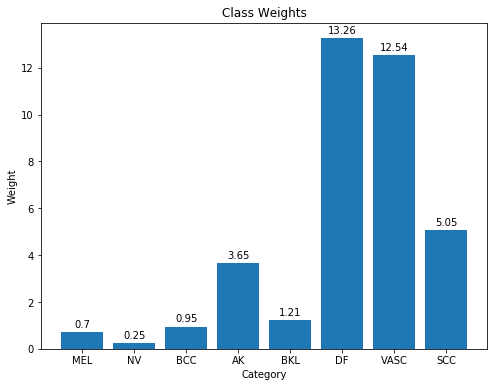

In [20]:
class_weight_dict = compute_class_weight_dict(df_train)
print('Class Weights Dictionary (without UNK):')

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('white')
ax.set_title('Class Weights')
ax.set(xlabel='Category', ylabel='Weight')
weights = [round(class_weight_dict[i], 2) for i in range(known_category_num)]
rects = ax.bar(known_category_names, weights);
autolabel(ax, rects)

fig.savefig(os.path.join("weight_distribution.pdf"), format='pdf', bbox_inches='tight', pad_inches=0)

### Per-channel Mean and Standard Deviation over the Training Set

In [ ]:
rgb_mean, rgb_std = calculate_mean_std(df_train['path'])
print("Mean:{}\nSTD:{}".format(rgb_mean, rgb_std))

# Output was:
# Mean:[0.6236094091893962, 0.5198354883713194, 0.5038435406338101]
# STD:[0.2421814437693499, 0.22354427793687906, 0.2314805420919389]

### Samples of each Known Category

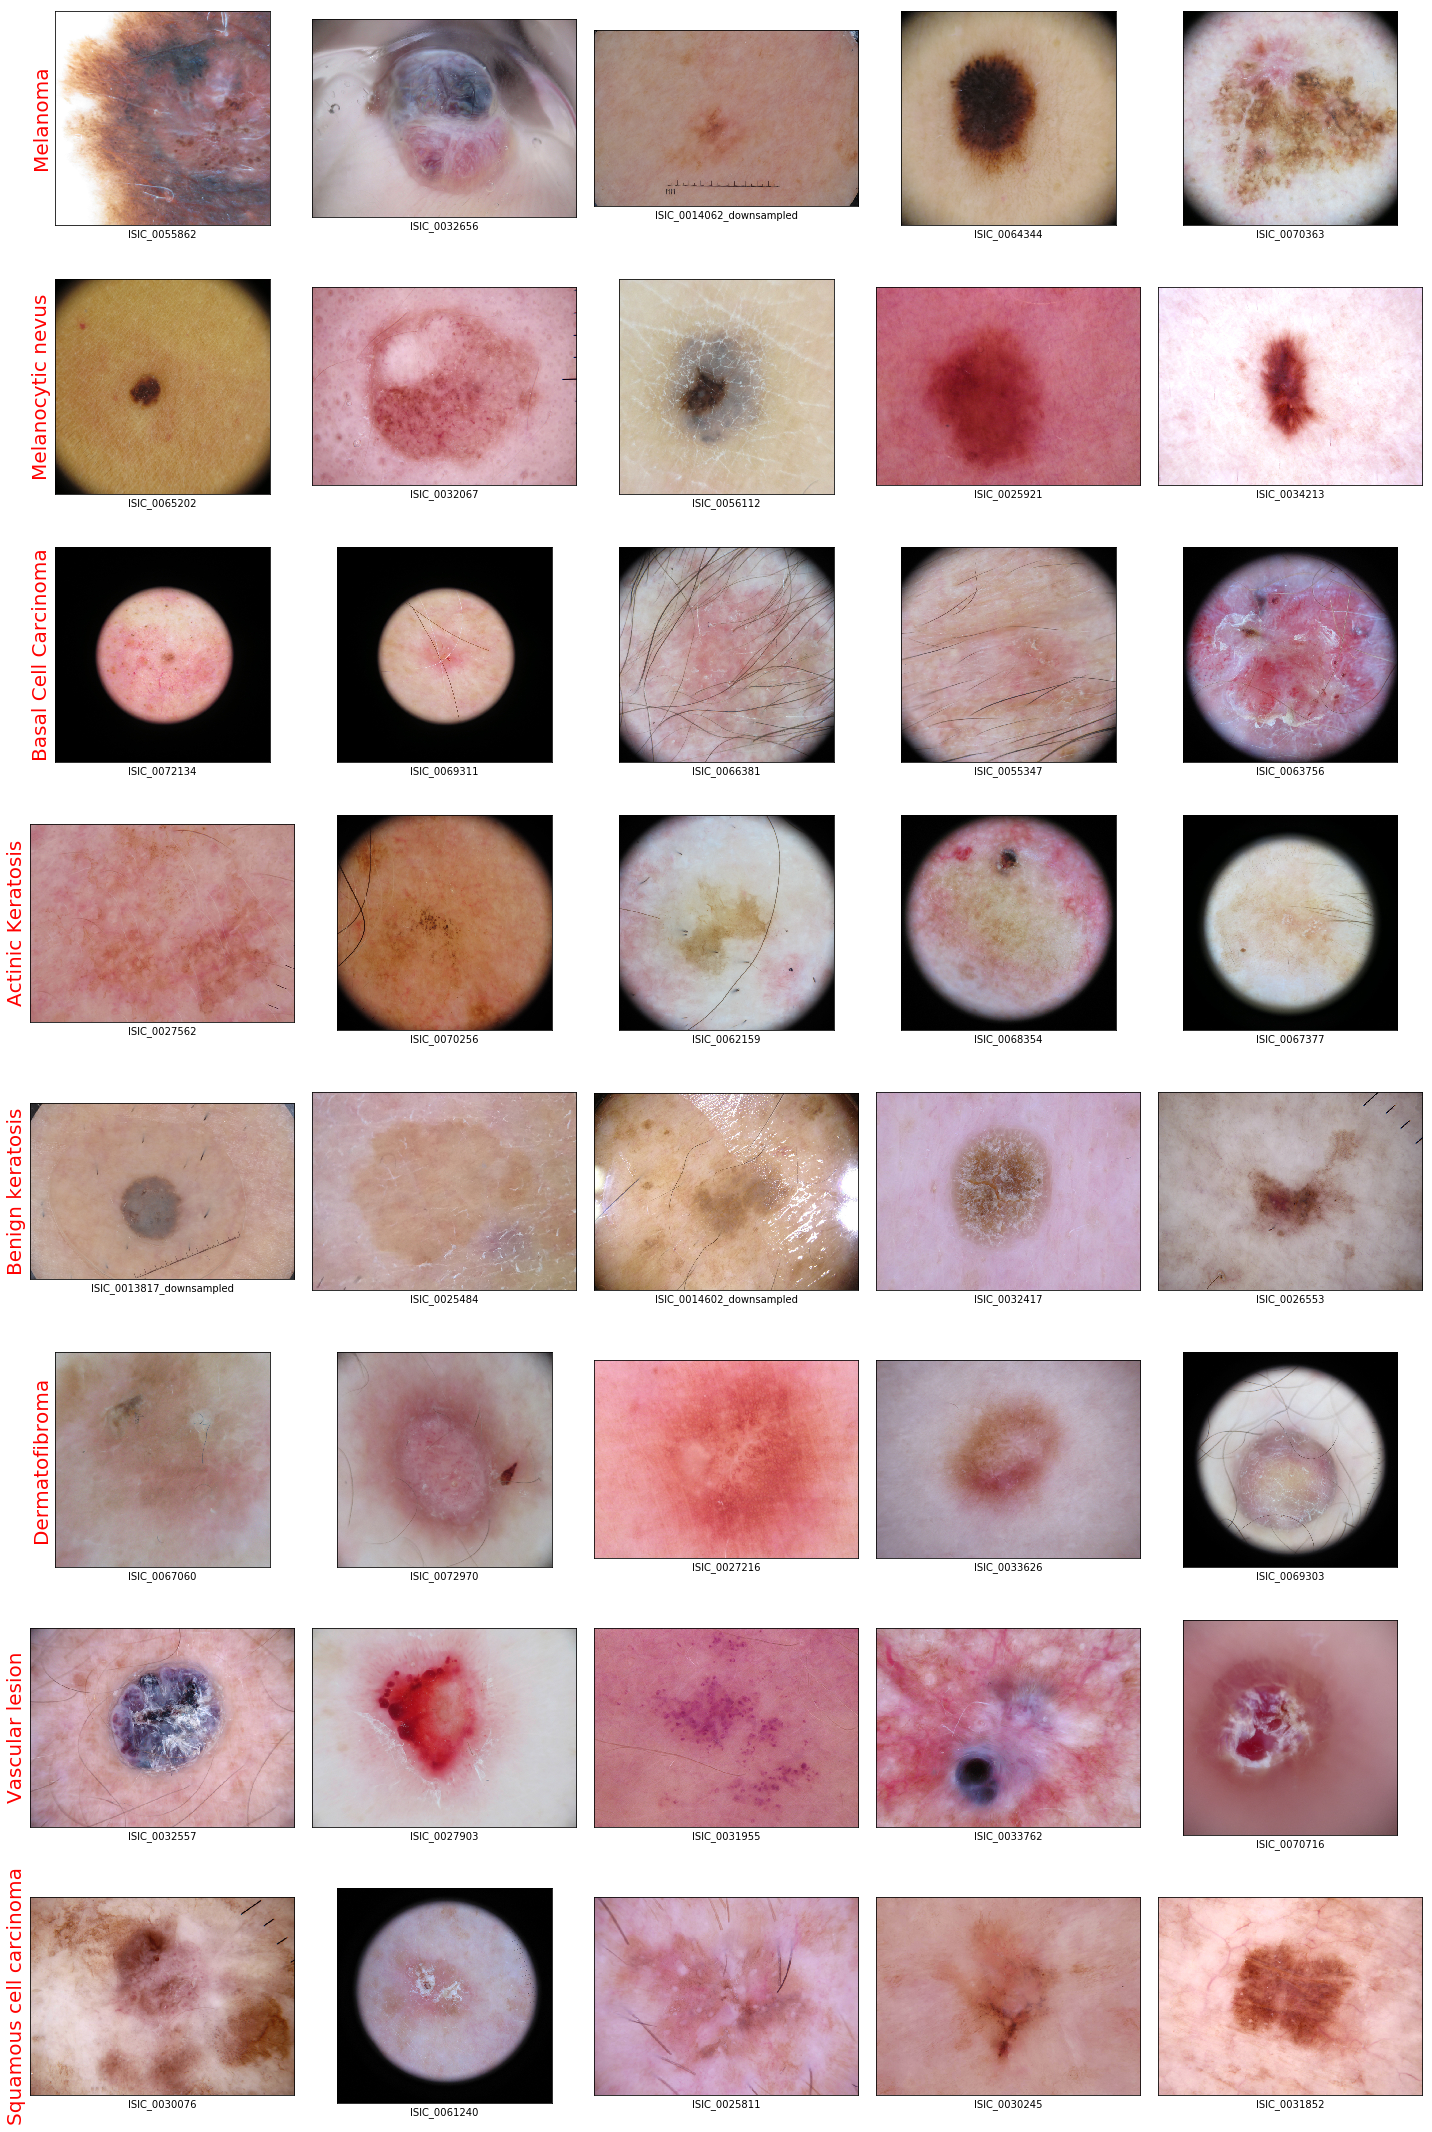

In [27]:
category_groups = df_train.groupby('category')

# Number of samples for each category
num_per_category = 5

fig, axes = plt.subplots(nrows=known_category_num, ncols=num_per_category, figsize=(20, 30))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
fig.patch.set_facecolor('white')
category_names = ["Melanoma", "Melanocytic nevus", "Basal Cell Carcinoma", "Actinic Keratosis", "Benign keratosis", "Dermatofibroma", "Vascular lesion", "Squamous cell carcinoma"]
for idx, val in enumerate(category_names):
    i = 0
    for index, row in category_groups.get_group(idx).head(num_per_category).iterrows():
        ax = axes[idx, i]
        ax.imshow(plt.imread(row['path']))
        ax.set_xlabel(row['image'])
        if ax.is_first_col():
            ax.set_ylabel(val, fontsize=20)
            ax.yaxis.label.set_color('red')
            #ax.margins(20)
        i += 1
    
fig.tight_layout()
fig.savefig('Samples of training data.jpg', format='jpg', dpi=200, pad_inches=2)

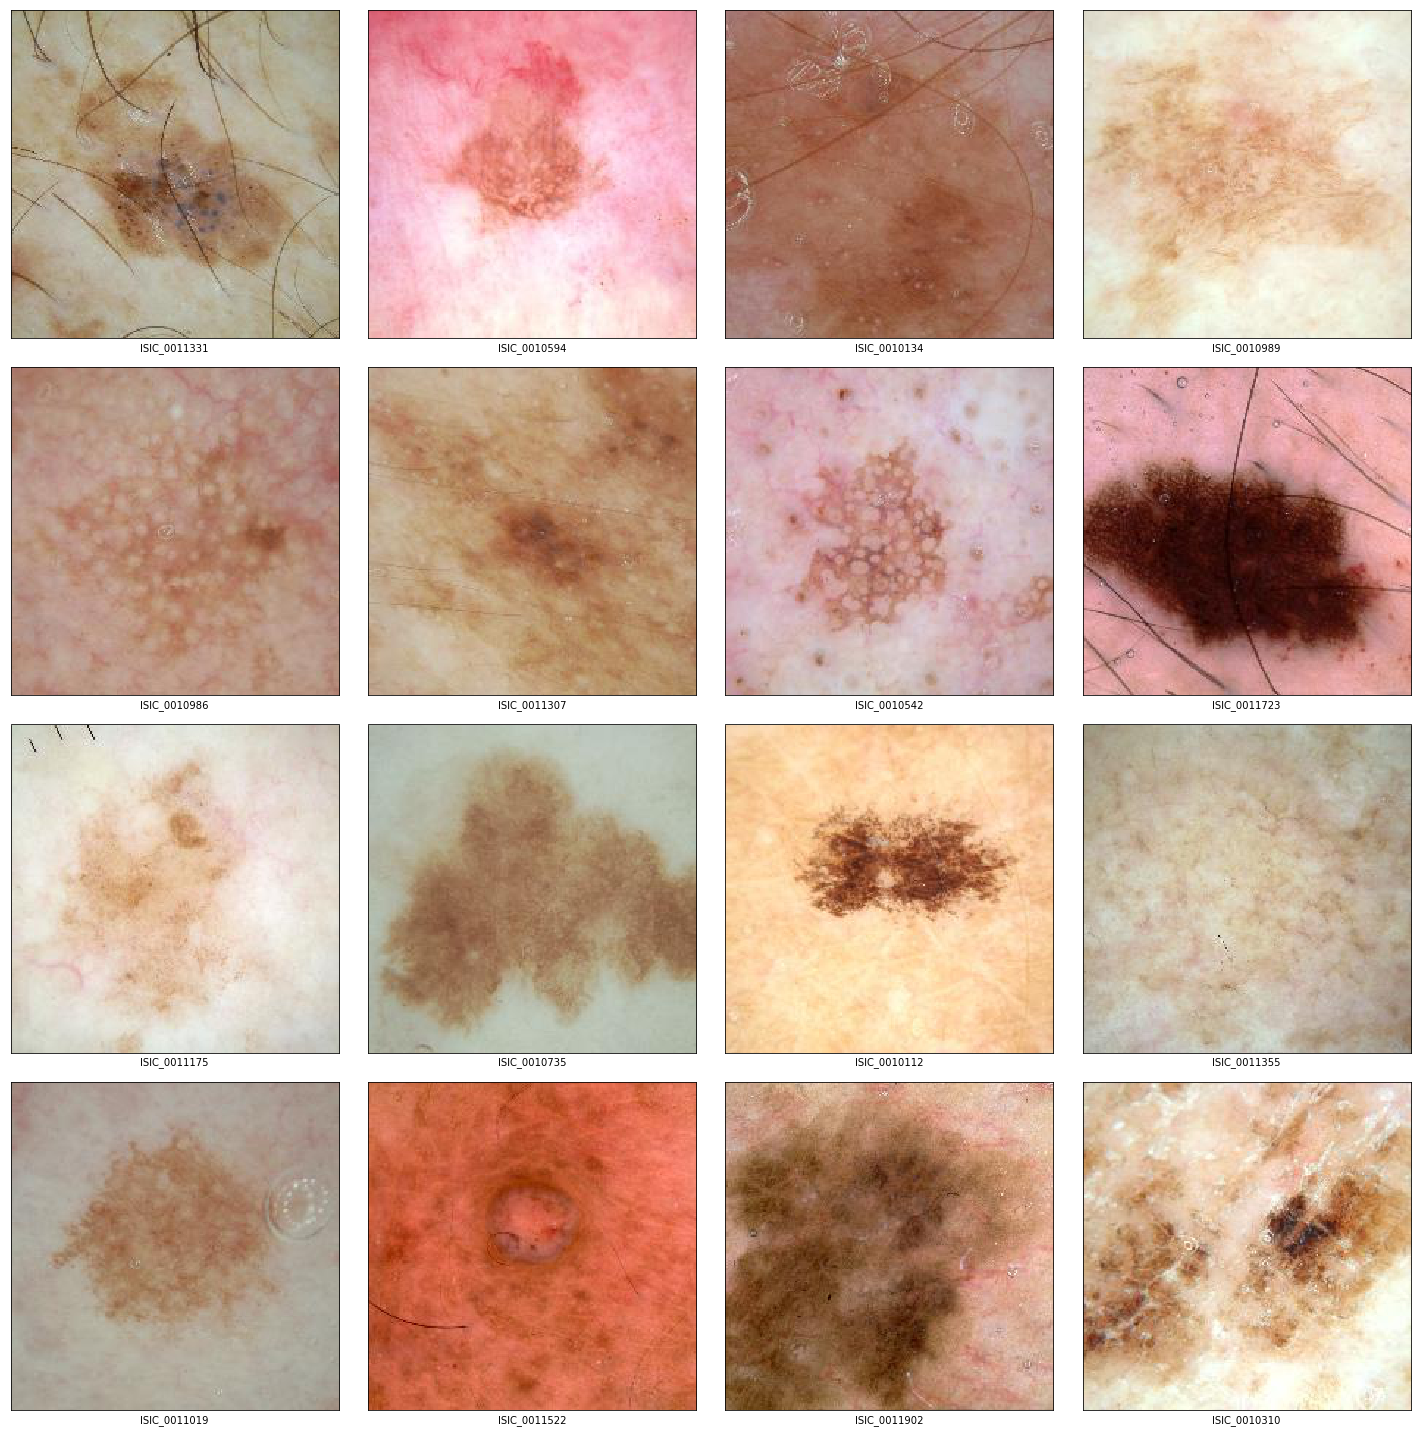

In [34]:
data_folder="../data/isic2019/sampled_unbalanced_20264_224"
training_image_folder = os.path.join(data_folder, 'ISIC_2019_Test_Input')
ground_truth_file = os.path.join(data_folder, 'ISIC_2019_Test_GroundTruth_Unknown.csv')

df_ground_truth, known_category_names, unknown_category_name = load_isic_training_data(
    training_image_folder, 
    ground_truth_file
)
category_groups = df_ground_truth.groupby('category')

# Number of samples for each category
num_per_category = 5

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
fig.patch.set_facecolor('white')

i=0
for index, row in category_groups.get_group(8).sample(n=16, random_state=20).iterrows():
    ax = axes[floor(i/4), i%4]
    ax.imshow(plt.imread(row['path']))
    ax.set_xlabel(row['image'])
    i+=1
    
fig.tight_layout()
fig.savefig('unknown_image_samples.pdf', format='pdf', dpi=200, pad_inches=2)